In [2]:
import xarray as xr
import numpy as np

In [3]:
# Correct Domain
domain = xr.open_dataset("../backend/params/vic/domain.nc")
# domain['mask'] = domain['mask'].where(domain['mask'] == np.nan, 0)

# domain['mask'] = domain['mask'].astype(np.int32)
domain

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237)
Coordinates:
  * lat      (lat) float64 9.594 9.656 9.719 9.781 ... 33.59 33.66 33.72 33.78
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    area     (lat, lon) float64 ...
    frac     (lat, lon) float64 ...
    mask     (lat, lon) int32 ...

In [4]:
# domain.to_netcdf("../backend/params/vic/domain_final.nc")

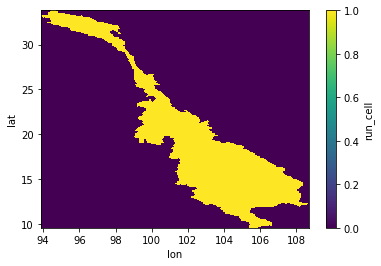

In [5]:
# Correct Param
param = xr.open_dataset("../backend/params/vic/params_beforeprocessing.nc")
param['run_cell'] = domain['mask']
# param = param.drop('run_cell')
# param['run_cell'] = param['run_cell'].where(param['run_cell'] != 1.0, 0)
# param['run_cell'] = param['run_cell'].fillna(0)
# param['run_cell'] = param['run_cell'].astype(np.int32)
param.run_cell.plot()

In [6]:
param

<xarray.Dataset>
Dimensions:       (lat: 388, lon: 237, month: 12, nlayer: 2, root_zone: 3, veg_class: 16)
Coordinates:
  * root_zone     (root_zone) int64 1 2 3
  * veg_class     (veg_class) int64 1 2 3 5 6 7 8 9 10 11 13 14 15 16 18 21
  * lat           (lat) float64 9.594 9.656 9.719 9.781 ... 33.66 33.72 33.78
  * lon           (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * nlayer        (nlayer) int64 1 2
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/44)
    gridcell      (lat, lon) float64 ...
    infilt        (lat, lon) float64 ...
    Ds            (lat, lon) float64 ...
    Dsmax         (lat, lon) float64 ...
    Ws            (lat, lon) float64 ...
    c             (lat, lon) float64 ...
    ...            ...
    root_depth    (veg_class, root_zone, lat, lon) float64 ...
    root_fract    (veg_class, root_zone, lat, lon) float64 ...
    LAI           (veg_class, month, lat, lon) float64 ...
    albedo        (veg_class, month, lat, lon) float64 ...
    veg_rough     (veg_class, month, lat, lon) float64 ...
    displacement  (veg_class, month, lat, lon) float64 ...

In [7]:
param.to_netcdf("../backend/params/vic/params.nc")